Computer store images as a mosaic of tiny squares. This is like the ancient art form of tile mosaic, or the melting bead kits kids play with today. Now, if these square tiles are too big, it’s then hard to make smooth edges and curves. The more and smaller tiles we use, the smoother or as we say less pixelated, the image will be. These sometimes get referred to as the resolution of the images.

Vector graphics are a somewhat different method of storing images that aim to avoid pixel related issues. But even vector images, in the end, are displayed as a mosaic of pixels. The word pixel means a picture element. A simple way to describe each pixel is using a combination of three colors, namely Red, Green, Blue. This is what we call an RGB image.

In an RGB image, each pixel is represented by three 8 bit numbers associated with the values for Red, Green, Blue respectively. Eventually using a magnifying glass, if we zoom a picture, we’ll see the picture is made up of tiny dots of little light or more specifically the pixels and what more interesting is to see that those tiny dots of little light are actually multiple tiny dots of little light of different colors which are nothing but Red, Green, Blue channels.

Every photograph, in digital form, is made up of pixels. They are the smallest unit of information that makes up a picture. Usually round or square, they are typically arranged in a 2-dimensional grid.

# **Import Image**

In [ ]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import cv2
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/image_processing/images/'
pic=root_path+"/rabit.jpg"
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
image=cv2.imread(pic, 1)
if ( image.any() == None):
    print("file not detected")
else:
    print("file detected")

file detected


Text(0.5, 1.0, 'Original Image')

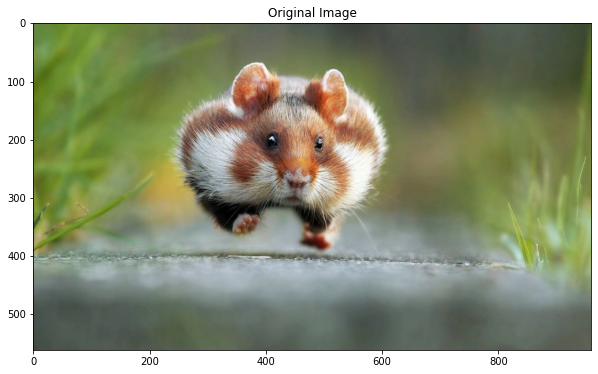

In [ ]:
plt.imshow(image[:,:,::-1])
plt.title("Original Image")

# Observe Basic Properties of the image

In [ ]:
print('Type of the image : ' , type(image))
print()
print('Shape of the image : {}'.format(image.shape))
print('Image Hight {}'.format(image.shape[0]))
print('Image Width {}'.format(image.shape[1]))
print('Dimension of Image {}'.format(image.ndim))

Type of the image :  <class 'numpy.ndarray'>

Shape of the image : (562, 960, 3)
Image Hight 562
Image Width 960
Dimension of Image 3


The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green, Blue. So, if we calculate the size of a RGB image, the total size will be counted as height x width x 3

In [ ]:
print('Image size {}'.format(image.size))
print('Maximum RGB value in this image {}'.format(image.max()))
print('Minimum RGB value in this image {}'.format(image.min()))

Image size 1618560
Maximum RGB value in this image 255
Minimum RGB value in this image 0


These values are important to verify since the eight bit color intensity is, can not be outside of the 0 to 255 range.

In [ ]:
# A specific pixel located at Row : 100 ; Column : 50 
# Each channel's value of it, gradually R , G , B
print('Value of only R channel {}'.format(image[ 100, 50, 0]))
print('Value of only G channel {}'.format(image[ 100, 50, 1]))
print('Value of only B channel {}'.format(image[ 100, 50, 2]))

Value of only R channel 46
Value of only G channel 143
Value of only B channel 109


OK, now let’s take a quick view of each channels in the whole image.

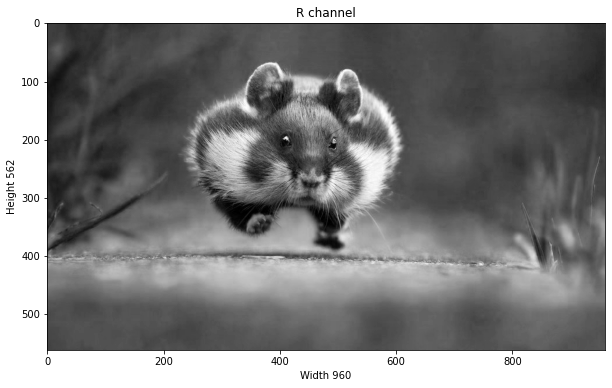

In [ ]:
plt.title('R channel')
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))

plt.imshow(image[ : , : , 0])
plt.show()

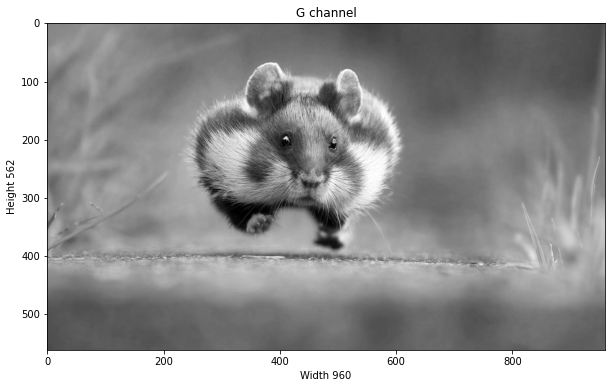

In [ ]:
plt.title('G channel')
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))
plt.imshow(image[ : , : , 1])
plt.show()

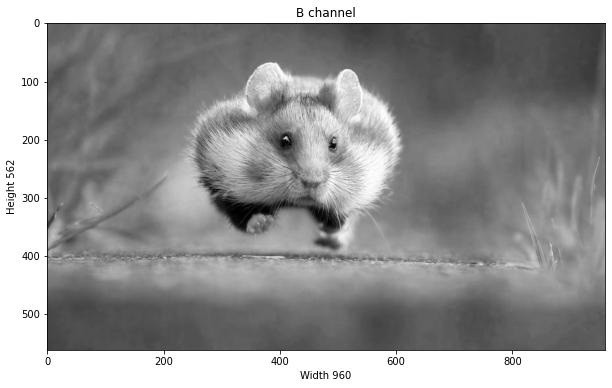

In [ ]:
plt.title('B channel')
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))
plt.imshow(image[ : , : , 2])
plt.show()

# Splitting Layers

Now, we know that each pixel of the image is represented by three integers. Splitting the image into separate color components is just a matter of pulling out the correct slice of the image array.

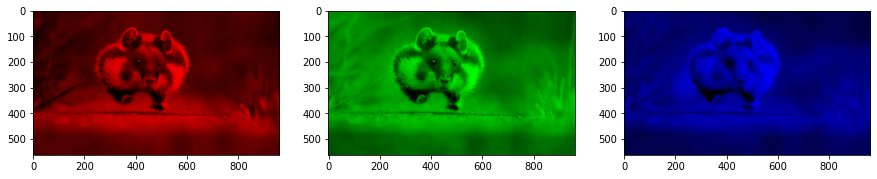

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(image.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = image[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)


# Grayscale
Black and white images are stored in 2-Dimentional arrays. There’re two types of Black and White images:

    Greyscale : Ranges of shades of grey : 0 ~ 255
    Binary: Pixel are either black or white : 0 or 255


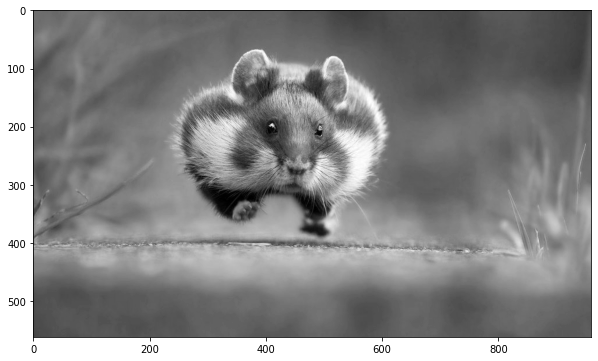

In [ ]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray = gray(image)  

plt.figure( figsize = (10,10))
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
plt.show()